In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory
from matplotlib import cm
from matplotlib.colors import Normalize

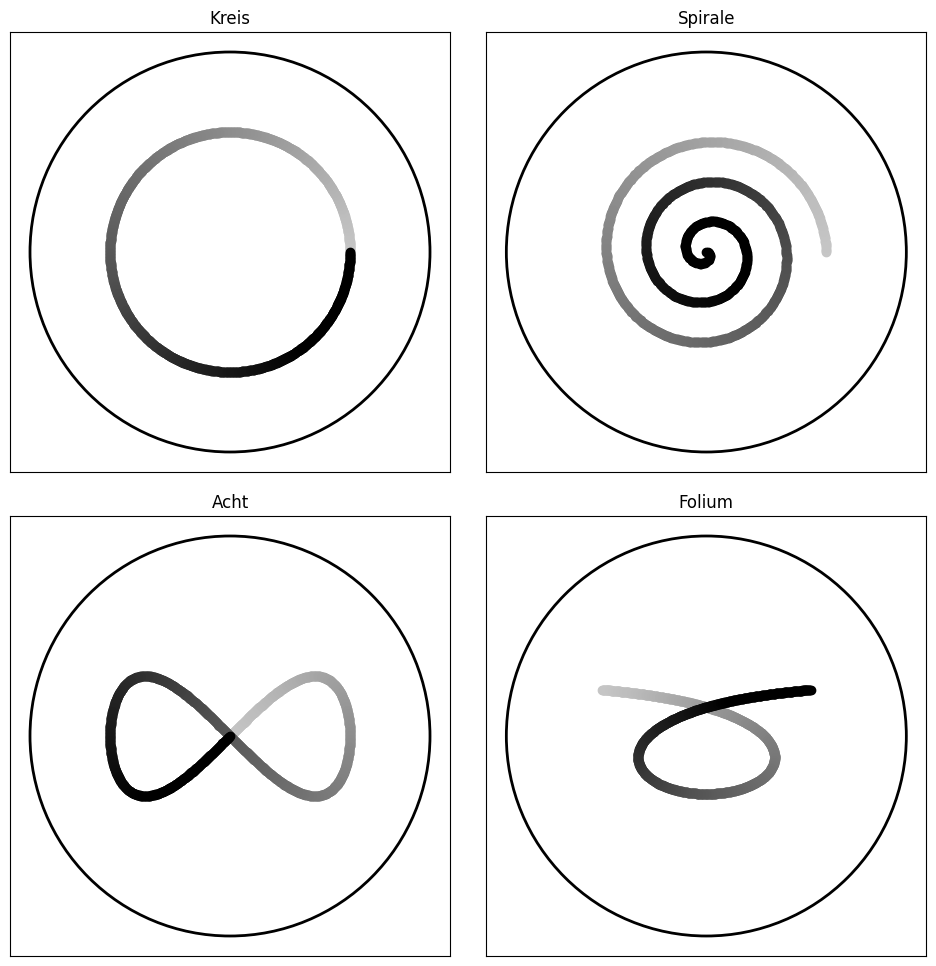

In [146]:
def create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius):
    """
    Create a figure showing trajectories with example points, circles, and frames
    
    Parameters:
    trajectories (list): List of trajectory types to plot
    Nsteps (int): Number of points per trajectory
    radius (float): Radius of the circles around points
    path_radius (float): Radius of the trajectory path
    """
    fig = plt.figure(figsize=(12, 12)) 
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    
    for i, traj in enumerate(trajectories):
        points = create_trajectory(traj, path_radius, Nsteps)
        ax = axes[i]
        margin = 0.1
        global_min_x = min(np.min(points[:, 0]) - margin, -1.1)
        global_max_x = max(np.max(points[:, 0]) + margin, 1.1)
        global_min_y = min(np.min(points[:, 1]) - margin, -1.1)
        global_max_y = max(np.max(points[:, 1]) + margin, 1.1)
        
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        num_example_points = 1000
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype = int)
        
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        

        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
            
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        ax.set_aspect('equal')
        ax.set_title(f'{traj}')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildung' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

trajectories = ["Kreis", "Spirale", "Acht", "Folium"]
Nsteps = 2000
radius = 0.0
path_radius = 0.6

fig = create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius)
# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'trajectory_visualization_interpol.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

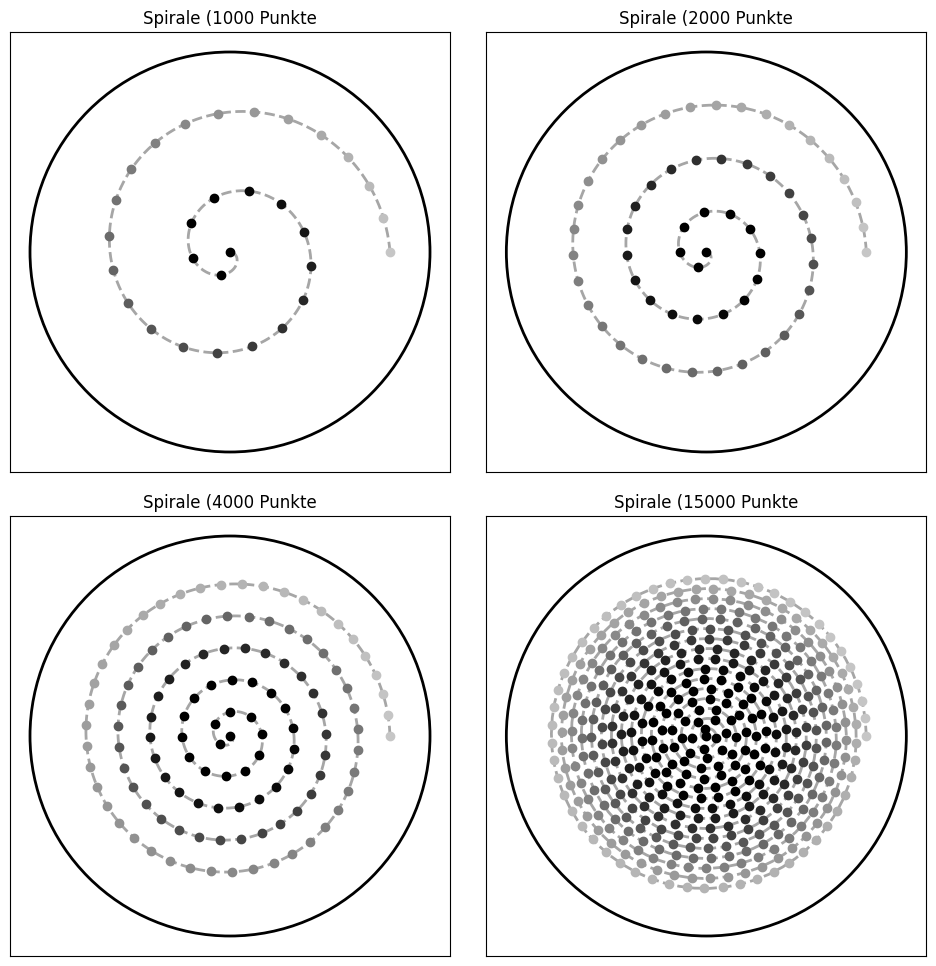

In [15]:
def create_spiral_resolution_comparison(point_counts=[1000, 2000, 4000, 6000], path_radius=0.6):
   
    fig = plt.figure(figsize=(12, 12)) 
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.1)  
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    for i, n_points in enumerate(point_counts):
        points = create_trajectory("Spirale", path_radius, n_points)
        ax = axes[i]
        margin = 0.1
        global_min_x = min(np.min(points[:, 0]) - margin, -1.1)
        global_max_x = max(np.max(points[:, 0]) + margin, 1.1)
        global_min_y = min(np.min(points[:, 1]) - margin, -1.1)
        global_max_y = max(np.max(points[:, 1]) + margin, 1.1)
        ax.plot(points[:, 0], points[:, 1], '--', color='grey', alpha=0.7, linewidth=2)
        
        num_example_points = 30 * (n_points // 1000)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
        
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        
        ax.set_aspect('equal')
        ax.set_title(f'Spirale ({n_points} Punkte')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        
    return fig

# Example usage:
import os
# Create 'Abbildungen' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

point_counts = [1000, 2000, 4000, 15000]
path_radius = 0.8
fig = create_spiral_resolution_comparison(point_counts, path_radius)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'spiral_resolution_comparison.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

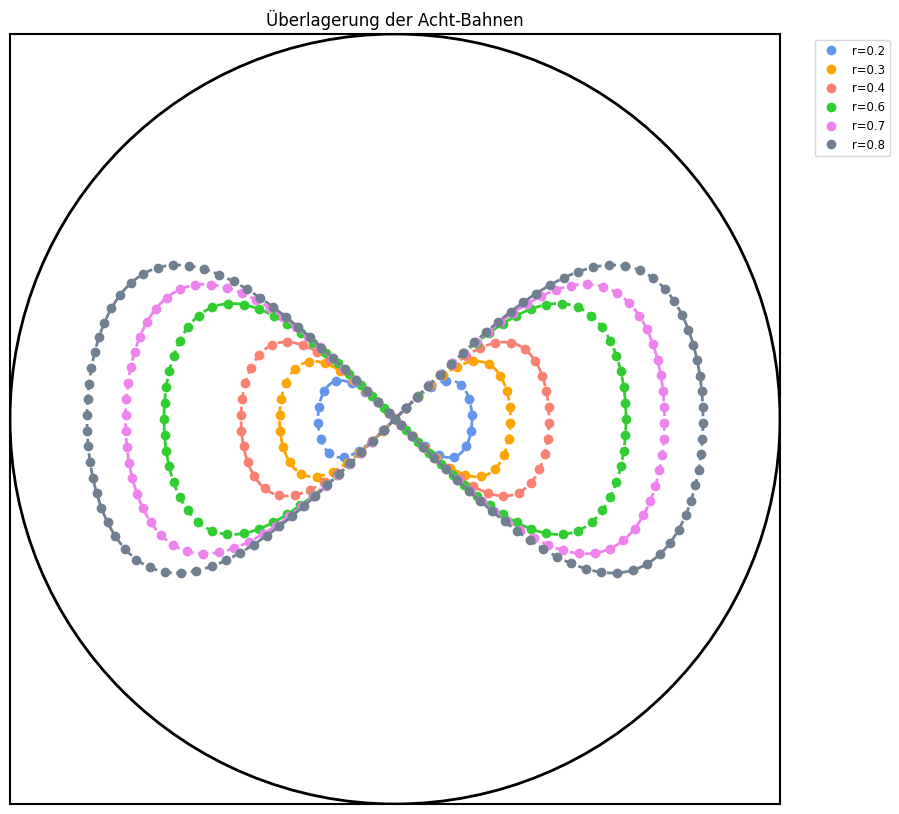

In [28]:
def create_overlay_comparison(traj_type, radii=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], base_points=2000):
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    colors = ['cornflowerblue', 'orange', 'salmon', 'limegreen', 
             'violet', 'slategray', 'red'][:len(radii)]
    
    for radius, base_color in zip(radii, colors):
        scale_factor = radius / min(radii)
        scaled_points = int(base_points * scale_factor)
        points = create_trajectory(traj_type, radius, scaled_points)
        
        ax.plot(points[:, 0], points[:, 1], '--', color= base_color, linewidth=2)
        
        base_example_points = 30
        num_example_points = int(base_example_points * scale_factor)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        
        for j, idx in enumerate(indices):
           ax.plot(points[idx, 0], points[idx, 1], 'o', color=base_color, 
                   markersize=6, label=f'r={radius:.1f}' if j == 0 else "")
    
    unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                        linewidth=2, linestyle='-')
    ax.add_patch(unit_circle)
    
    ax.set_aspect('equal')
    ax.set_title(f'Überlagerung der {traj_type}-Bahnen')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Rahmen sichtbar machen
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)
        spine.set_color('black')
    
    # Achsenlimits genau auf ±1 setzen
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    
    return fig

traj_type = "Acht"  # String statt Variable
radii = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8]
base_points = 2000

fig = create_overlay_comparison(traj_type, radii, base_points)
save_path = os.path.join('Abbildungen', f'{traj_type}_overlay_comparison.pdf')  # f-string für Formatierung
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

#Mit den Achten und der Folium Kurve kann ich so machen und dass ich eine Spirale verwende für die Kreise (da es ja eigentlich
#viele Kreise sind)

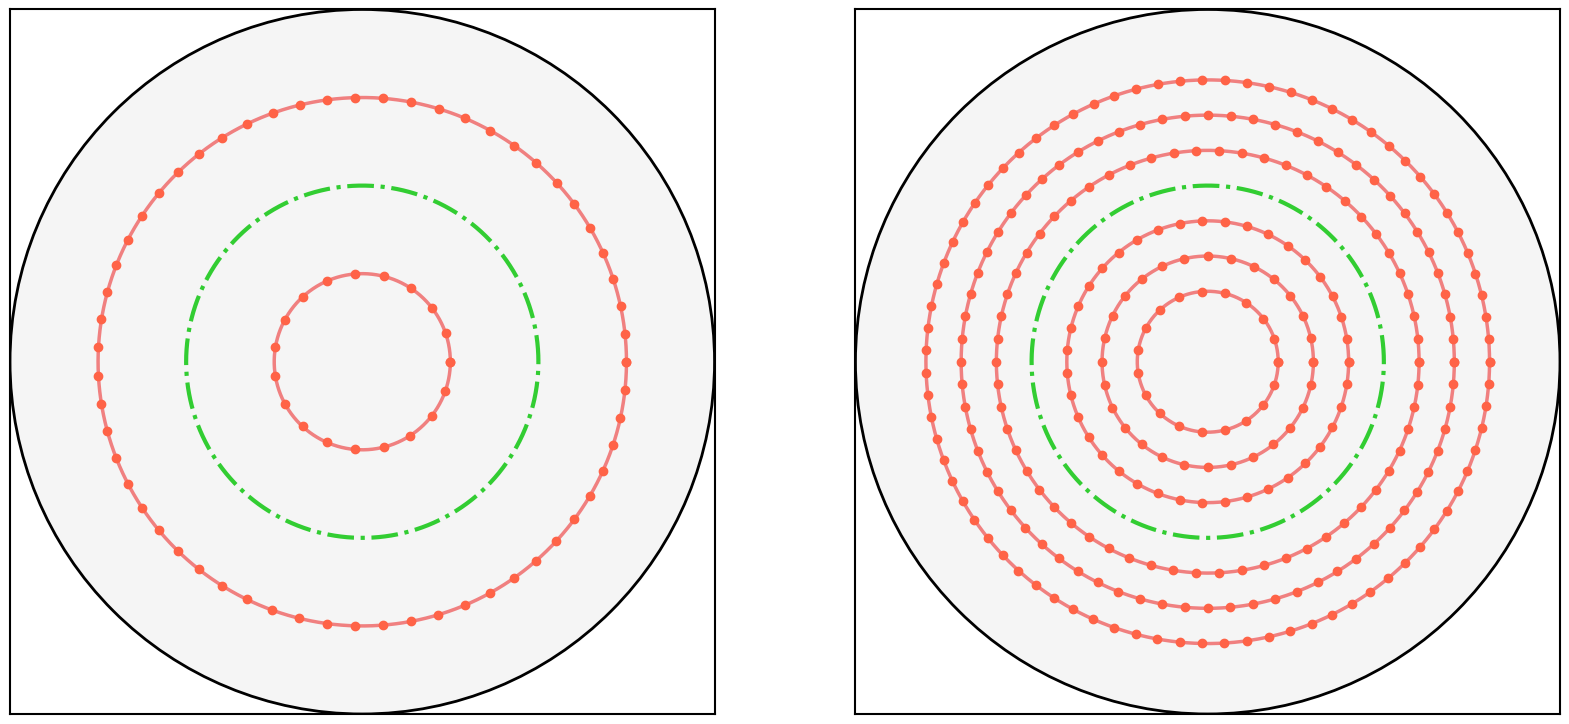

In [132]:
def create_overlay_comparison(traj_type, training_radii_left, test_radii_left, training_radii_right, test_radii_right, base_points=6000):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    base_example_points = 20
    
    # Linker Plot
    for radius in test_radii_left:
        scale_factor = radius / min(training_radii_left + test_radii_left)
        scaled_points = int(base_points * scale_factor)
        points = create_trajectory(traj_type, radius, scaled_points)
        ax1.plot(points[:, 0], points[:, 1], linestyle='dashdot', color='limegreen', linewidth=3, 
                label=f'Test r={radius:.1f}')
    
    for idx, radius in enumerate(training_radii_left):
        scale_factor = radius / min(training_radii_left + test_radii_left)
        scaled_points = int(base_points * scale_factor)
        num_example_points = int(base_example_points * scale_factor)
        
        points = create_trajectory(traj_type, radius, scaled_points)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        ax1.plot(points[:, 0], points[:, 1], linestyle='-', color='lightcoral', linewidth=2.5, 
                label=f'Test r={radius:.1f}')
        for point_idx in indices:
            ax1.plot(points[point_idx, 0], points[point_idx, 1], 'o', 
                   color="tomato", markersize=6)
    
    # Rechter Plot
    for radius in test_radii_right:
        scale_factor = radius / min(training_radii_right + test_radii_right)
        scaled_points = int(base_points * scale_factor)
        points = create_trajectory(traj_type, radius, scaled_points)
        ax2.plot(points[:, 0], points[:, 1], linestyle='dashdot', color='limegreen', linewidth=3, 
                label=f'Test r={radius:.1f}')
    
    for idx, radius in enumerate(training_radii_right):
        scale_factor = radius / min(training_radii_right + test_radii_right)
        scaled_points = int(base_points * scale_factor)
        num_example_points = int(base_example_points * scale_factor)
        
        points = create_trajectory(traj_type, radius, scaled_points)
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        ax2.plot(points[:, 0], points[:, 1], linestyle='-', color='lightcoral', linewidth=2.5, 
                label=f'Test r={radius:.1f}')
        for point_idx in indices:
            ax2.plot(points[point_idx, 0], points[point_idx, 1], 'o', 
                   color="tomato", markersize=6)
    
    # Einstellungen für beide Plots
    for ax in [ax1, ax2]:
        unit_circle = Circle((0, 0), radius=1, fill=True, facecolor='whitesmoke', 
                             edgecolor='black', linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1.5)
            spine.set_color('black')
        
        ax.set_xlim(-1.0, 1.0)
        ax.set_ylim(-1.0, 1.0)
    
    return fig

traj_type = "Kreis"
training_radii_right = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8]  
test_radii_left = [0.5]
training_radii_left = [0.25, 0.75]
test_radii_right = [0.5]

fig = create_overlay_comparison(traj_type, training_radii_left, test_radii_left, 
                              training_radii_right, test_radii_right, base_points=2000)
save_path = os.path.join('Abbildungen', f'{traj_type}_overlay_comparison_double.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [133]:
from src.util import load_exp_data

In [154]:
_, _, _, position = load_exp_data("exp_data30")

In [155]:
position.shape

(2544, 2)

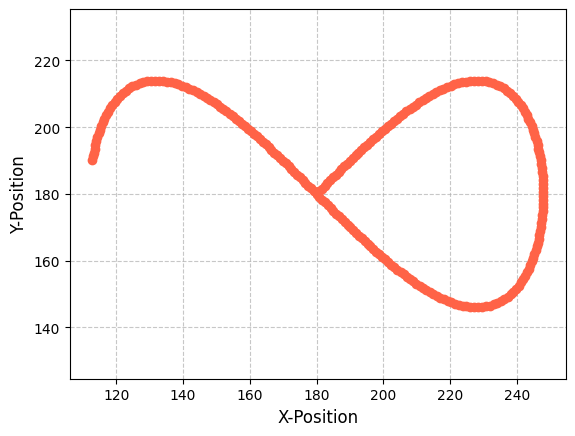

In [156]:
for point_idx in range(0, position.shape[0], 10):  # Schritte von 10
    plt.plot(position[point_idx, 0], position[point_idx, 1], 'o', 
             color="tomato", markersize=6)

plt.xlabel("X-Position", fontsize=12)
plt.ylabel("Y-Position", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.show()